# Run an agent based SEIRX simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

from model_SEIRX import SEIRX
import viz

## Single model run

In [2]:
# interaction network of inhabitants
G = nx.readwrite.gpickle.read_gpickle('data/interactions_single_quarter.gpickle')
# number of inhabitants
N_patients = len(G.nodes)
# the number of employees. Note that the number of inhabitants is defined by
# the interaction network supplied in WB_2_static
N_employees = 10
# number of steps (days) the simulation will run
N_steps = 100
# verbosity level (can be 0, 1, 2) that prints increasingly detailed information
# about the simulation
verbosity = 0
# enables testing and tracing actions (run with testing=False) to simulate
# unhindered spread of the virus through the nursing home
testing = True
# interval for preventive inhabitant (patient) and emplyee screens
screening_interval_patients = 14
screening_interval_employees = 7
# interval for follow-up screens in case of a new positive test result
follow_up_testing_interval = 4
# in "continuous" mode employees will have a (low) probability to become an index
# case in every simulation step and introduce new infections. In "single" mode,
# a single infection is introduced through an employee in the first simulation
# step but employees no longer have a probability to become newly infected in
# every time step
index_case_mode = 'continuous_employee'
# probability of employees to become an index case every simulation step
index_probability_employee = 0.01
# time until a test returns a result
time_until_test_result = 2
# fixed seed of the simulation, using the same seed repeats the same simulation
# if the same parameters are chosen
seed = 5

model = SEIRX(G, N_employees, verbosity=verbosity, testing=testing, seed=seed,
                        screening_interval_patients=screening_interval_patients, 
                        screening_interval_employees=screening_interval_employees,
                        follow_up_testing_interval = follow_up_testing_interval,
                        index_case_mode=index_case_mode, 
                        index_probability_employee=index_probability_employee,
                        time_until_test_result=time_until_test_result)
for i in range(N_steps):
    if verbosity > 0: print('*** step {} ***'.format(i+1))
    model.step()

### Visualise time-series of inhabitant infections

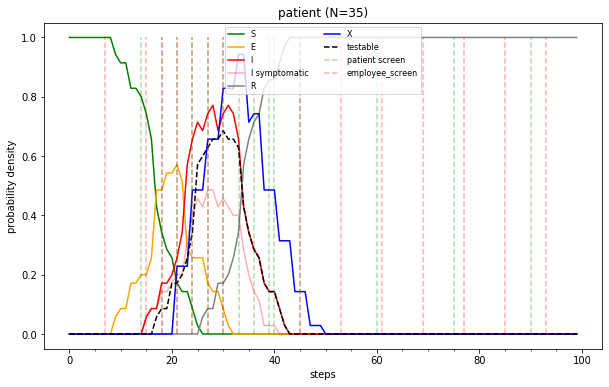

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
viz.draw_infection_timeline(model, 'patient', ax)

### Visualise time-series of employee infections

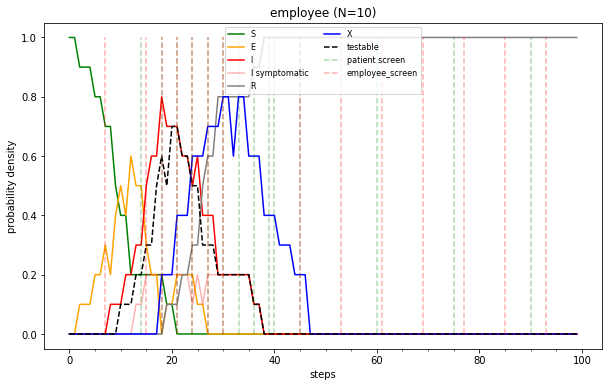

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
viz.draw_infection_timeline(model, 'employee', ax)

### Visualise a snapshot of agent states

In [5]:
pos = nx.drawing.layout.spring_layout(G, dim=2, weight='weight')

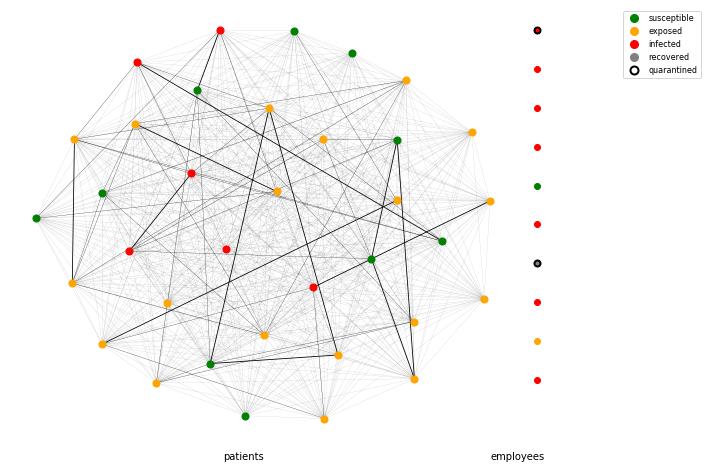

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
viz.draw_states(model, 20, pos, ax)

### Have a peek at the raw data

In [8]:
data = model.datacollector.get_model_vars_dataframe()
data.head(2)

,E_patient,I_patient,I_symptomatic_patient,R_patient,X_patient,T_patient,E_employee,I_employee,I_symptomatic_employee,R_employee,X_employee,T_employee,screen_patients,screen_employees
0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,False,False
1,0,0,0.0,0,0,0,0,0,0.0,0,0,0,False,False
